In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Load data

### Output descriptive statistics

In [2]:
df = pd.read_csv("res/data.tsv",sep='\t')
df.head()

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


In [3]:
rename_dic = dict(zip(df.columns, 
                      ['school_name', 'school_type', 'sat', 
                       'acceptance', 'money_per_student', 
                       'top', 'phd', 'graduate']))
df.rename(columns=rename_dic, inplace=True)
df.school_type = df.school_type.map({'Lib Arts': 0, 'Univ': 1})

df.describe()

,school_type,sat,acceptance,money_per_student,top,phd,graduate
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.500000,1263.960000,37.840000,30247.200000,74.440000,90.560000,83.480000
std,0.505076,62.329591,13.363612,15266.172682,13.515162,8.258972,7.557237
min,0.000000,1109.000000,17.000000,17520.000000,47.000000,58.000000,61.000000
25%,0.000000,1225.000000,25.750000,20182.250000,65.000000,86.250000,77.250000
50%,0.500000,1264.000000,36.000000,24994.500000,76.500000,93.000000,85.500000
75%,1.000000,1304.500000,47.750000,36803.750000,85.000000,97.750000,89.000000
max,1.000000,1400.000000,67.000000,102262.000000,98.000000,100.000000,95.000000


In [5]:
df = df[['school_type', 'sat', 'acceptance', 'money_per_student', 'top', 'phd', 'graduate']]
df.head()

,school_type,sat,acceptance,money_per_student,top,phd,graduate
0,0,1315,22,26636,85,81,93
1,0,1310,24,27487,78,93,88
2,0,1336,28,23772,86,90,93
3,0,1300,24,25703,78,95,90
4,0,1250,49,27879,76,91,86


count      50.000000
mean     1263.960000
std        62.329591
min      1109.000000
25%      1225.000000
50%      1264.000000
75%      1304.500000
max      1400.000000
Name: sat, dtype: float64


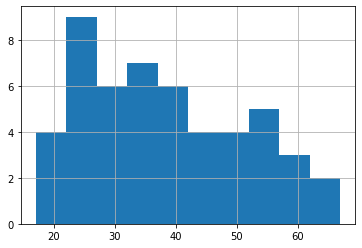

In [6]:
print(df.sat.describe())
df.acceptance.hist()

count    50.000000
mean     37.840000
std      13.363612
min      17.000000
25%      25.750000
50%      36.000000
75%      47.750000
max      67.000000
Name: acceptance, dtype: float64


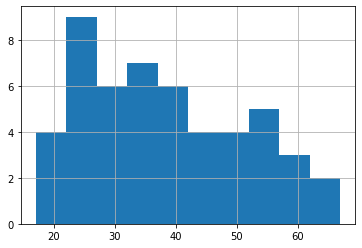

In [7]:
print(df.acceptance.describe())
df.acceptance.hist()

count    50.000000
mean     37.840000
std      13.363612
min      17.000000
25%      25.750000
50%      36.000000
75%      47.750000
max      67.000000
Name: acceptance, dtype: float64


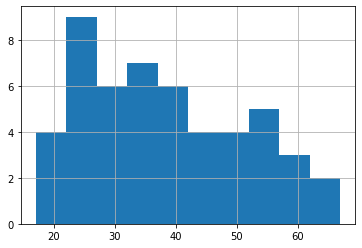

In [8]:
print(df.acceptance.describe())
df.acceptance.hist()

count        50.000000
mean      30247.200000
std       15266.172682
min       17520.000000
25%       20182.250000
50%       24994.500000
75%       36803.750000
max      102262.000000
Name: money_per_student, dtype: float64


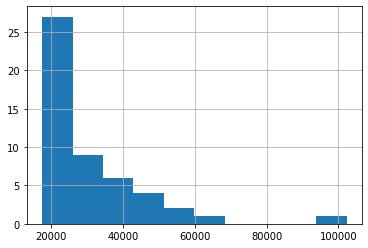

In [9]:
print(df.money_per_student.describe())
df.money_per_student.hist()


count     50.000000
mean      90.560000
std        8.258972
min       58.000000
25%       86.250000
50%       93.000000
75%       97.750000
max      100.000000
Name: phd, dtype: float64


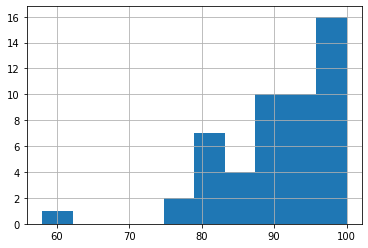

In [10]:
print(df.phd.describe())
df.phd.hist()

count    50.000000
mean     74.440000
std      13.515162
min      47.000000
25%      65.000000
50%      76.500000
75%      85.000000
max      98.000000
Name: top, dtype: float64


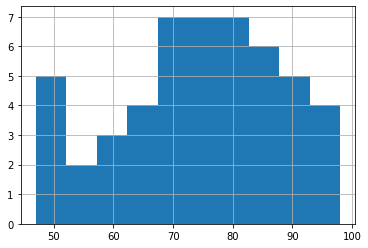

In [11]:
print(df.top.describe())
df.top.hist()

count    50.000000
mean     83.480000
std       7.557237
min      61.000000
25%      77.250000
50%      85.500000
75%      89.000000
max      95.000000
Name: graduate, dtype: float64


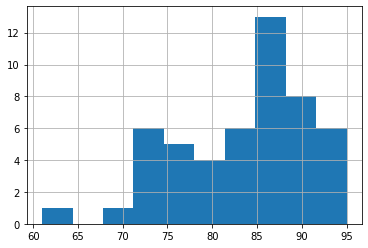

In [12]:
print(df.graduate.describe())
df.graduate.hist()

### Find anomalies


In [13]:
def find_anomalies(data):
    anomalies = []

    data_std = np.std(data)
    data_mean = np.mean(data)
    three_sigma = data_std * 3
    
    lower_limit  = data_mean - three_sigma 
    upper_limit = data_mean + three_sigma


    for point in data:
        if point > upper_limit or point < lower_limit:
            anomalies.append(point)
    return anomalies

In [14]:
for key in df.keys():
    try:
        if find_anomalies(df[key]):
            print(key, find_anomalies(df[key]))
        else:
            print(key, 'Not anomalies')
    except:
        continue

school_type Not anomalies
sat Not anomalies
acceptance Not anomalies
money_per_student [102262]
top Not anomalies
phd [58]
graduate [61]


In [15]:
def plot_without_anomalies(df, key):
    outlier = find_anomalies(df[key])
    new_df = df[~df[key].isin(outlier)][key]
    print(new_df.describe())
    new_df.hist()

count       49.000000
mean     28777.510204
std      11298.759661
min      17520.000000
25%      20179.000000
50%      24718.000000
75%      35804.000000
max      61921.000000
Name: money_per_student, dtype: float64


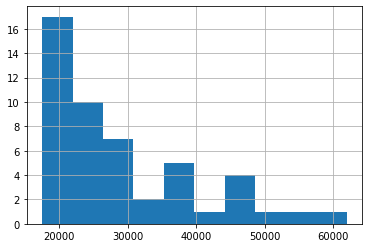

In [16]:
plot_without_anomalies(df, 'money_per_student')

count    49.000000
mean     83.938776
std       6.896280
min      68.000000
25%      78.000000
50%      86.000000
75%      89.000000
max      95.000000
Name: graduate, dtype: float64


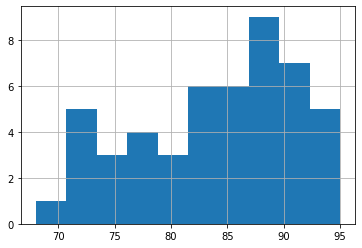

In [17]:
plot_without_anomalies(df, 'graduate')

count     49.000000
mean      91.224490
std        6.862535
min       75.000000
25%       87.000000
50%       93.000000
75%       98.000000
max      100.000000
Name: phd, dtype: float64


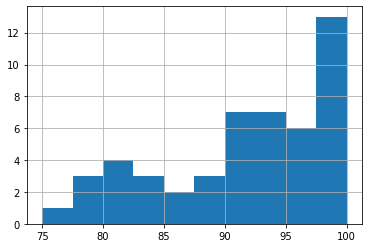

In [18]:
plot_without_anomalies(df, 'phd')

### Visualization and explain correlations


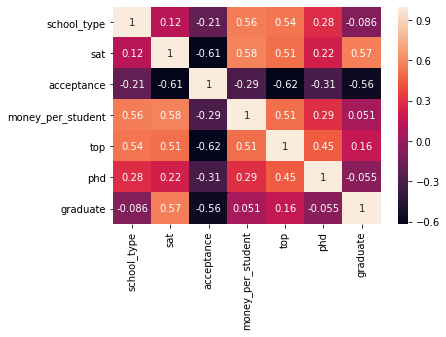

In [19]:
sns.heatmap(df.corr(), annot=True)

ВЫВОДЫ
- чем выше SAT тем больший процент учащихся оканчивают оброзовательное учреждение
- учащиеся с высоким SAT выбирают дорогостоещее образвоание


- наличе большого кол-ва преподавателей с PHD не влияет на конечное чило студентов, которые закончат ВУЗ
- чем строже отбор в ВУЗ тем большее кол-во учищихся его закончит



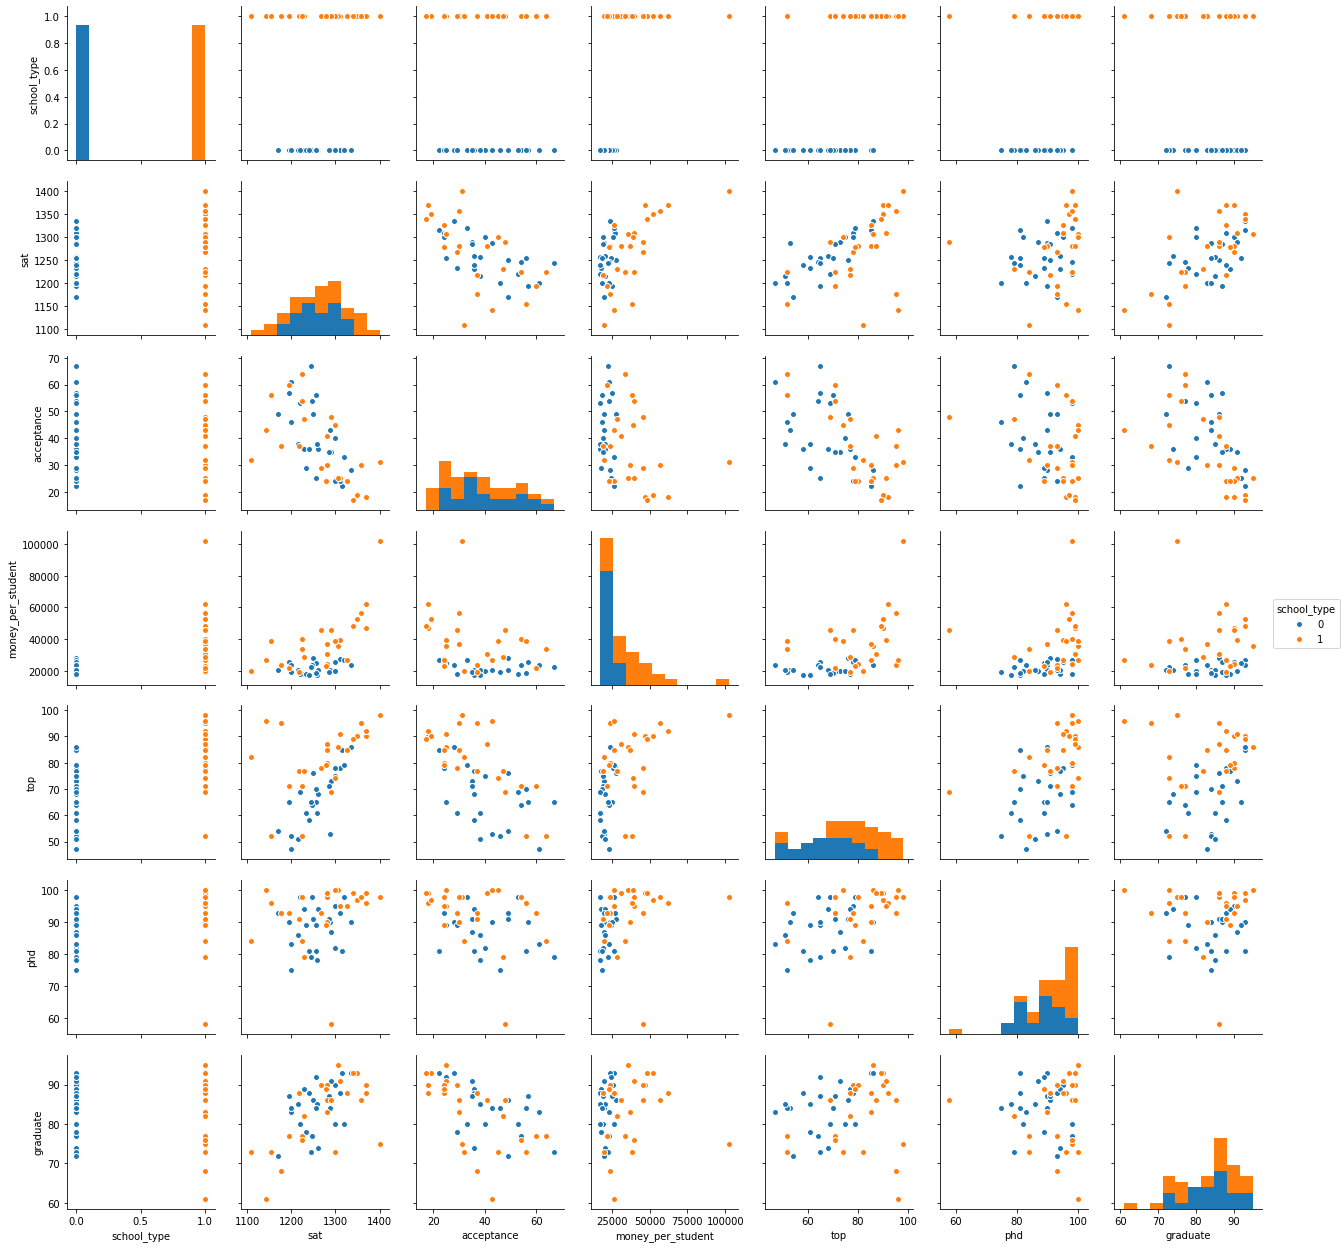

In [20]:
sns.pairplot(hue='school_type', data=df)